## Задача предсказания энергопотребления

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['text.usetex'] =  True  # How to set True?
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 16

In [3]:
data = pd.read_excel("https://sourceforge.net/p/mvr/code/HEAD/tree/data/EnergyConsumption.xls?format=raw")

In [4]:
data.head(5)

,Date,WeekDay,Hour,ConsumprionMWtH,TemperatureC
0,2005-01-01 00:00:00,6,00:00:00,1289.617859,-10.676569
1,2005-01-01 01:00:00,6,01:00:00,1265.573853,-12.041959
2,2005-01-01 02:00:00,6,02:00:00,1273.188232,-13.198006
3,2005-01-01 03:00:00,6,03:00:00,1279.703979,-13.999279
4,2005-01-01 04:00:00,6,04:00:00,1292.839539,-14.782819


In [5]:
data['timestamp'] = data.Date.apply(pd.datetime.timestamp)

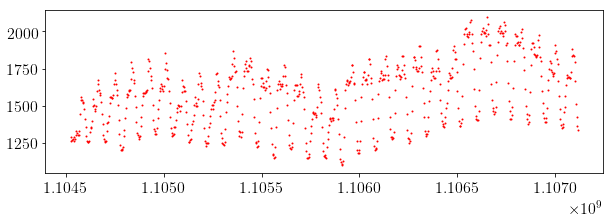

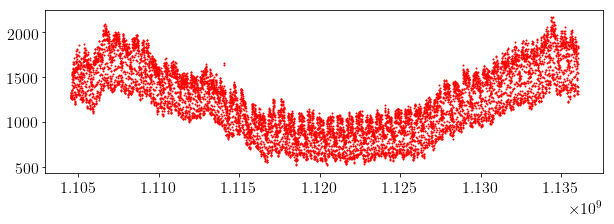

In [6]:
#plt.plot(data['timestamp'].iloc[:720], data['ConsumprionMWtH'].iloc[:720])
plt.figure(figsize=(10,3))
plt.scatter(data['timestamp'].iloc[:720], data['ConsumprionMWtH'].iloc[:720], s=1, c='r');

plt.figure(figsize=(10,3))
plt.scatter(data['timestamp'], data['ConsumprionMWtH'], s=1, c='r');

In [7]:
data.head(2)

,Date,WeekDay,Hour,ConsumprionMWtH,TemperatureC,timestamp
0,2005-01-01 00:00:00,6,00:00:00,1289.617859,-10.676569,1.104527e+09
1,2005-01-01 01:00:00,6,01:00:00,1265.573853,-12.041959,1.104530e+09


In [8]:
data.tail(2)

,Date,WeekDay,Hour,ConsumprionMWtH,TemperatureC,timestamp
8758,2005-12-31 22:00:00,6,1900-12-29 22:00:00,1348.616089,-13.459662,1.136056e+09
8759,2005-12-31 23:00:00,6,1900-12-29 23:00:00,1311.786438,-13.528102,1.136059e+09


# 1. построим несколько моделей

In [9]:
def generate_features(df):
    a = df['WeekDay'].values
    b = df['Hour'].values
    c = df['TemperatureC'].values
    d = np.array(df['Month'])
    e = np.ones(len(a))
    
    X = np.vstack([a,b,c,d,e]).T
    y = np.array(df['ConsumprionMWtH'])
    return X, y
    
def linear_regression_fit(X, y):
    ata = np.dot(X.T,X)
    inv = np.linalg.pinv(ata)
    w = np.dot(np.dot(inv, X.T), y)
    return w

def linear_regression_predict(X, w):
    return np.dot(X, w)

def mse(a, b):
    return np.round(np.sqrt(np.mean((a - b)**2)), 3)

In [10]:
data['Hour'] = data['Date'].dt.hour
data['Month'] = data['Date'].dt.month

In [11]:
X, y = generate_features(data)

In [12]:
X.shape

(8760, 5)

## 1.1 Модель 1

В качестве train возьмем 1ый месяц
Обучим линейную модель с признаками:

- Месяц
- День недели
- Час
- Температура

а также добавим свободный член.

In [13]:
X_train, X_test, y_train, y_test = X[:720], X[720:], y[:720], y[720:]

In [14]:
w = linear_regression_fit(X_train, y_train)
y_pred_train = linear_regression_predict(X_train, w)

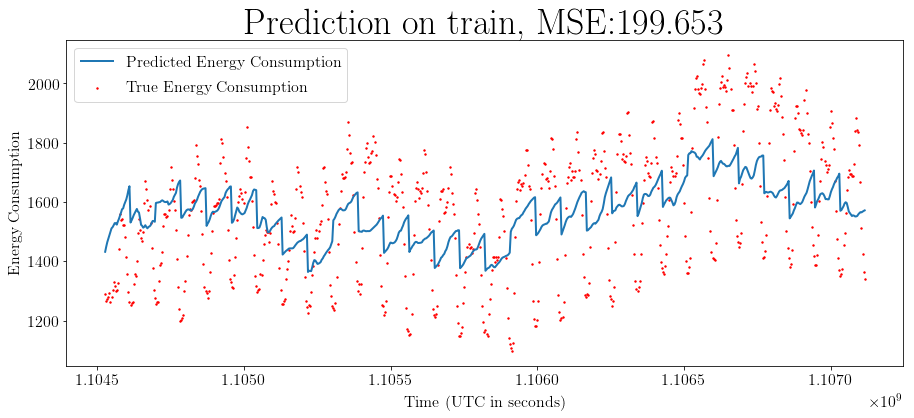

In [15]:
plt.figure(figsize=(15,6))
plt.title(f'Prediction on  train, MSE:{mse(y_train, y_pred_train)}')
plt.plot(data['timestamp'].iloc[:720], y_pred_train, lw=2, label='Predicted Energy Consumption')
plt.scatter(data['timestamp'].iloc[:720], data['ConsumprionMWtH'].iloc[:720],
            s=2, c='r', label='True Energy Consumption');
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')
plt.legend();

In [16]:
y_pred_test = linear_regression_predict(X_test, w)

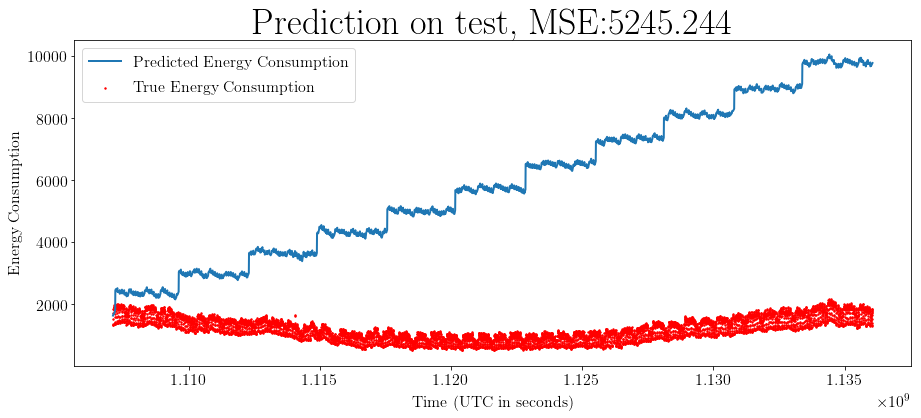

In [17]:
plt.figure(figsize=(15,6))
plt.title(f'Prediction on  test, MSE:{mse(y_test, y_pred_test)}')
plt.plot(data['timestamp'].iloc[720:], y_pred_test, lw=2, label='Predicted Energy Consumption')
plt.scatter(data['timestamp'].iloc[720:], data['ConsumprionMWtH'].iloc[720:],
            s=2, c='r', label='True Energy Consumption');
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')
plt.legend();

Что-то пошло не так, судя по всему предсказывать по Январю весь год

используя линейную модель не очень то получается,

попробуем добавить больше данных (увеличим размер train)

## 1.2 Модель 1 (больше обучающая выборка)

возьмем первые пол года для обучения

In [18]:
X_train, X_test, y_train, y_test = X[:720*6], X[720*6:], y[:720*6], y[720*6:]

In [19]:
w = linear_regression_fit(X_train, y_train)
y_pred_train = linear_regression_predict(X_train, w)
y_pred_test = linear_regression_predict(X_test, w)

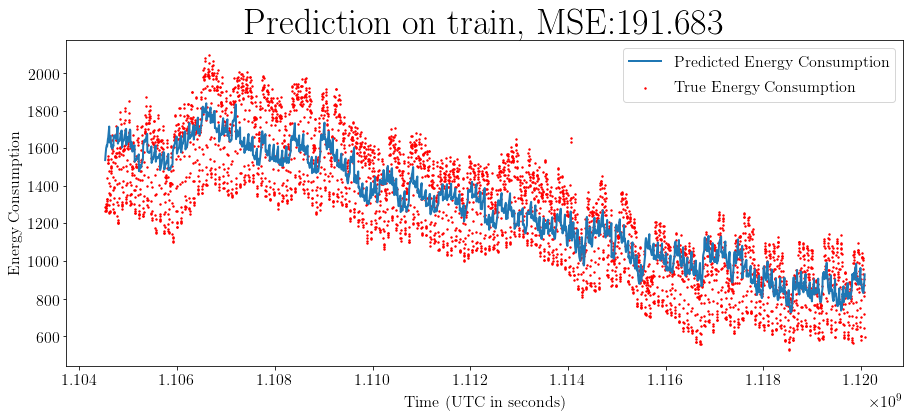

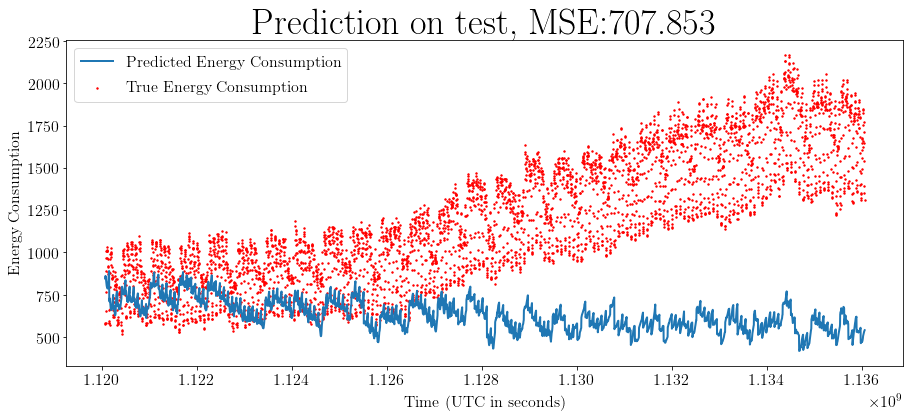

In [20]:
plt.figure(figsize=(15,6))
plt.title(f'Prediction on  train, MSE:{mse(y_train, y_pred_train)}')
plt.plot(data['timestamp'].iloc[:720*6], y_pred_train, lw=2, label='Predicted Energy Consumption')
plt.scatter(data['timestamp'].iloc[:720*6], data['ConsumprionMWtH'].iloc[:720*6],
            s=2, c='r', label='True Energy Consumption');
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')
plt.legend();


plt.figure(figsize=(15,6))
plt.title(f'Prediction on  test, MSE:{mse(y_test, y_pred_test)}')
plt.plot(data['timestamp'].iloc[720*6:], y_pred_test, lw=2, label='Predicted Energy Consumption')
plt.scatter(data['timestamp'].iloc[720*6:], data['ConsumprionMWtH'].iloc[720*6:],
            s=2, c='r', label='True Energy Consumption');
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')
plt.legend();

### Перерисуем картинку

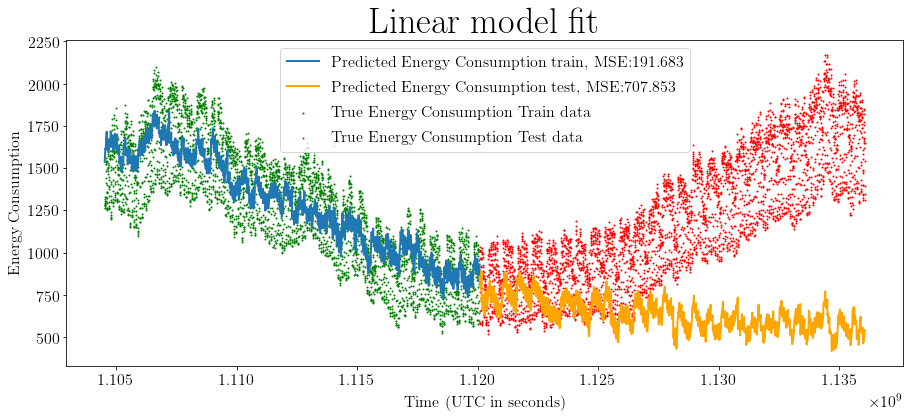

In [21]:
plt.figure(figsize=(15,6))
plt.title('Linear model fit')
plt.plot(data['timestamp'].iloc[:720*6], y_pred_train, lw=2,
         label=f'Predicted Energy Consumption train, MSE:{mse(y_train, y_pred_train)}')
plt.scatter(data['timestamp'].iloc[:720*6], data['ConsumprionMWtH'].iloc[:720*6],
            s=1, c='g', label='True Energy Consumption Train data');
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')

plt.plot(data['timestamp'].iloc[720*6:], y_pred_test, lw=2, c='orange',
         label=f'Predicted Energy Consumption test, MSE:{mse(y_test, y_pred_test)}')
plt.scatter(data['timestamp'].iloc[720*6:], data['ConsumprionMWtH'].iloc[720*6:],
            s=1, c='r', label='True Energy Consumption Test data');
plt.legend();

## Вывод

Похоже что наша модель в основном улавливает сезонный тренд - 

понижение потребления энергие в летние месяцы относительно зимних,

но не может, уловить изменения в этом тренде.

Попробуем закодировать сезонность:

так наш первый месяц Январь очень близок по Энергопотреблению к Декабрю,

но текущее признаковое представление этого не отражает.

Январь закодирован - 1, а Декабрь - 12

## 1.3 Модель 2.

Обучим линейную модель с признаками:

- Месяц (закодированный с помощью косинуса)
- День недели
- Час
- Температура

а также добавим свободный член.

обучаться снова будем на первых 6 месяцах

In [22]:
def encode_month(month):
    return np.cos(month * np.pi / 6)

In [23]:
data['encode_month'] = data['Month'].apply(encode_month)

In [24]:
def generate_features(df):
    a = df['WeekDay'].values
    b = df['Hour'].values
    c = df['TemperatureC'].values
    d = np.array(df['encode_month'])
    e = np.ones(len(a))
    
    X = np.vstack([a,b,c,d,e]).T
    y = np.array(df['ConsumprionMWtH'])
    return X, y

In [25]:
X, y = generate_features(data)

In [26]:
X_train, X_test, y_train, y_test = X[:720*6], X[720*6:], y[:720*6], y[720*6:]

In [27]:
w = linear_regression_fit(X_train, y_train)
y_pred_train = linear_regression_predict(X_train, w)
y_pred_test = linear_regression_predict(X_test, w)

In [28]:
print(w)

[ -20.95113442    3.01385296   -9.15736965  232.08933543 1361.93692145]


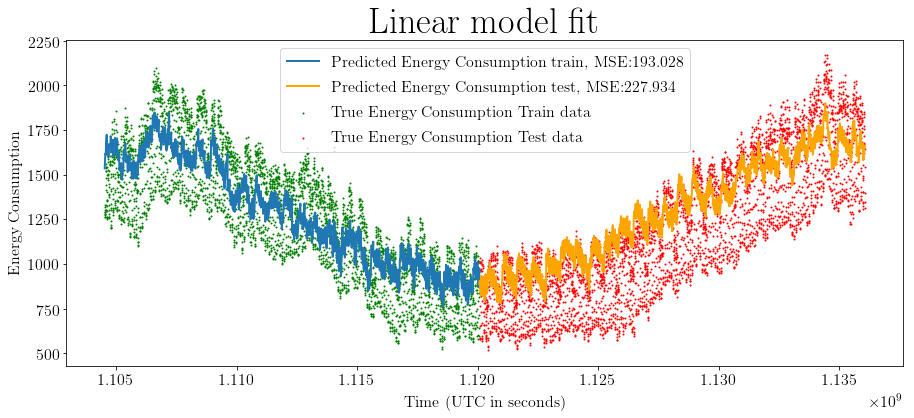

In [29]:
plt.figure(figsize=(15,6))
plt.title('Linear model fit')
plt.plot(data['timestamp'].iloc[:720*6], y_pred_train, lw=2,
         label=f'Predicted Energy Consumption train, MSE:{mse(y_train, y_pred_train)}')
plt.scatter(data['timestamp'].iloc[:720*6], data['ConsumprionMWtH'].iloc[:720*6],
            s=1, c='g', label='True Energy Consumption Train data');
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')

plt.plot(data['timestamp'].iloc[720*6:], y_pred_test, lw=2, c='orange',
         label=f'Predicted Energy Consumption test, MSE:{mse(y_test, y_pred_test)}')
plt.scatter(data['timestamp'].iloc[720*6:], data['ConsumprionMWtH'].iloc[720*6:],
            s=1, c='r', label='True Energy Consumption Test data');
plt.legend();

## Здорово! 

Кажется что наш трюк с добавлением сезонности отлично сработал.

Но мы кажется забыли отнормировать все признаки.

В качестве нашей третьей модели будем обучаться на отнормированных данных

## 1.4 Модель 3

Обучим линейную модель с признаками:

- Месяц (закодированный с помощью косинуса)
- День недели (Стандартизуем)
- Час (Стандартизуем)
- Температура (Стандартизуем)

а также добавим свободный член.

обучаться снова будем на первых 6 месяцах.

День недели и Час мы можем стандартизовать на всей выборке,

с температурой будем осторожнее.

In [30]:
def get_mu_sigma(x):
    return np.mean(x), np.std(x)

def normalize(x):
    return (x - x.mean())/x.std()

In [31]:
def generate_features(df):
    a = normalize(df['WeekDay'].values)
    b = normalize(df['Hour'].values)
    c = df['TemperatureC'].values
    d = np.array(df['encode_month'])
    e = np.ones(len(a))
    
    X = np.vstack([a,b,c,d,e]).T
    y = np.array(df['ConsumprionMWtH'])
    return X, y

In [32]:
X, y = generate_features(data)

In [33]:
X_train, X_test, y_train, y_test = X[:720*6], X[720*6:], y[:720*6], y[720*6:]

In [34]:
mu, sigma = get_mu_sigma(X_train[:, 2])
X_train[:, 2] = normalize(X_train[:, 2])

X_test[:, 2] = (X_test[:, 2] - mu) / sigma

In [35]:
w = linear_regression_fit(X_train, y_train)
y_pred_train = linear_regression_predict(X_train, w)
y_pred_test = linear_regression_predict(X_test, w)

In [36]:
print(w)

[ -41.90211159   20.86245244 -135.70633051  232.08933543 1313.36946659]


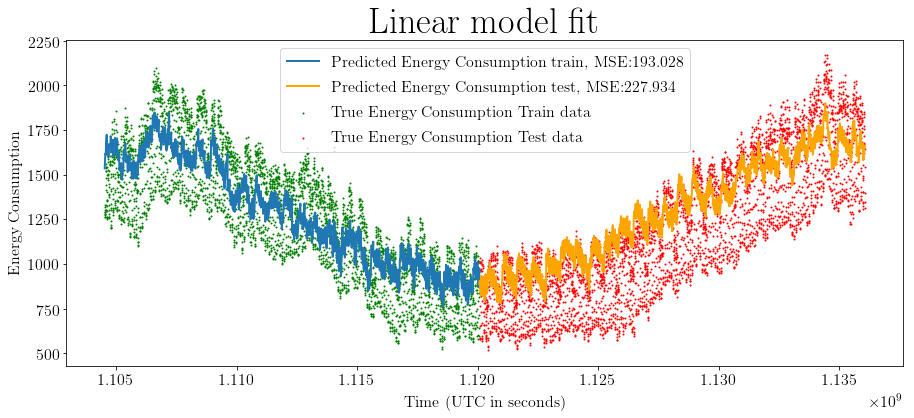

In [37]:
plt.figure(figsize=(15,6))
plt.title('Linear model fit')
plt.plot(data['timestamp'].iloc[:720*6], y_pred_train, lw=2,
         label=f'Predicted Energy Consumption train, MSE:{mse(y_train, y_pred_train)}')
plt.scatter(data['timestamp'].iloc[:720*6], data['ConsumprionMWtH'].iloc[:720*6],
            s=1, c='g', label='True Energy Consumption Train data');
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')

plt.plot(data['timestamp'].iloc[720*6:], y_pred_test, lw=2, c='orange',
         label=f'Predicted Energy Consumption test, MSE:{mse(y_test, y_pred_test)}')
plt.scatter(data['timestamp'].iloc[720*6:], data['ConsumprionMWtH'].iloc[720*6:],
            s=1, c='r', label='True Energy Consumption Test data');
plt.legend();

Полученные результаты несильно отличаются от результатов, полученных при использовании модели без нормировки.

Посмотрев на веса, попробуем понять почему:

Веса до нормировки: -20.95113442    3.01385296   -9.15736965  232.08933543 1361.93692145

Веса после нормировки:  -41.90211159   20.86245244 -135.70633051  232.08933543 1313.36946659

Значения признаков уменьшились, а значения весов - уменьшились.

## 2.1 Дисперсия предсказания

В качестве модели возьмем Модель 2. (закодированная сезонность без нормировки остальных признаков).

В качестве обучающего периода возьмем первые 6 месяцев.

Будем случайно выбирать из них 1% для сэмплирования, а затем предсказывать последние 6 месяцев.

In [38]:
def sample_data(x):
    n = x.shape[0]
    indx = np.arange(n)
    np.random.shuffle(indx)
    return indx[:n//100]

In [39]:
def generate_features(df):
    a = df['WeekDay'].values
    b = df['Hour'].values
    c = df['TemperatureC'].values
    d = np.array(df['encode_month'])
    e = np.ones(len(a))
    
    X = np.vstack([a,b,c,d,e]).T
    y = np.array(df['ConsumprionMWtH'])
    return X, y

In [40]:
X, y = generate_features(data)
X_train, X_test, y_train, y_test = X[:720*6], X[720*6:], y[:720*6], y[720*6:]


In [41]:
from tqdm import tqdm_notebook

In [42]:
y_pred = np.zeros((100, y_test.shape[0]))

for i in tqdm_notebook(range(100)):
    ind = sample_data(X_train)
    X_sampled, y_sampled = X_train[ind], y_train[ind]
    w = linear_regression_fit(X_sampled, y_sampled)
    y_pred[i] = linear_regression_predict(X_test, w)

## 2.2 Изобразим дисперсию предсказания


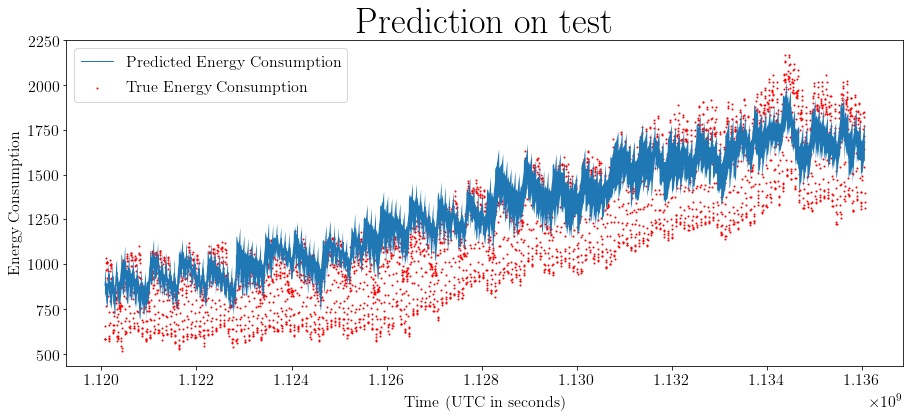

In [43]:
y_pred_test = y_pred.mean(axis=0)

plt.figure(figsize=(15,6))
plt.title(f'Prediction on  test')
plt.plot(data['timestamp'].iloc[720*6:], y_pred_test, lw=1, label='Predicted Energy Consumption')
plt.scatter(data['timestamp'].iloc[720*6:], data['ConsumprionMWtH'].iloc[720*6:],
            s=1, c='r', label='True Energy Consumption');
plt.fill_between(data['timestamp'].iloc[720*6:],
                 y_pred_test - y_pred.std(axis=0),
                 y_pred_test + y_pred.std(axis=0))
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')
plt.legend();


Поскольку дисперсия у моделей обученных на разных подвыборках данных (сэмплах)

получилась не очень большая, нарисуем предсказание не на пол года вперед а на месяц

In [44]:
y_pred.shape

(100, 4440)

In [45]:
y_pred = y_pred[...,:720]

In [46]:
y_pred_test.shape

(4440,)

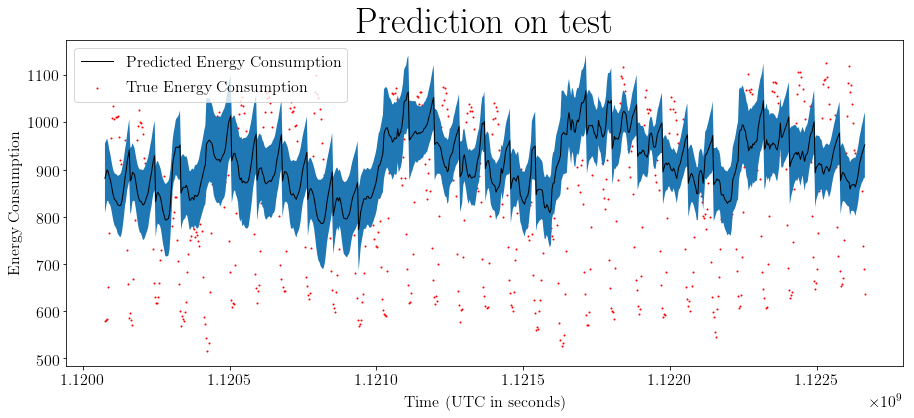

In [47]:
y_pred_test = y_pred.mean(axis=0)

plt.figure(figsize=(15,6))
plt.title(f'Prediction on  test')
plt.plot(data['timestamp'].iloc[720*6:720*7], y_pred_test, lw=1, c='k',label='Predicted Energy Consumption')
plt.scatter(data['timestamp'].iloc[720*6:720*7], data['ConsumprionMWtH'].iloc[720*6:720*7],
            s=1, c='r', label='True Energy Consumption');
plt.fill_between(data['timestamp'].iloc[720*6:720*7],
                 y_pred_test - y_pred.std(axis=0),
                 y_pred_test + y_pred.std(axis=0))
plt.xlabel('Time (UTC in seconds)')
plt.ylabel('Energy Consumption')
plt.legend();

Мы можем сделать вывод, что используя эту модель мы получаем сравнительно